<a href="https://colab.research.google.com/github/hansa31/EDA_Tutorial1/blob/main/EPA1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#data manipulation library
import pandas as pd
import numpy as np

#data visualization library
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

#apply some styling
plt.style.use("ggplot")
rcParams['figure.figsize'] = (12,6)

# importing a dataset
from sklearn.datasets import load_wine

In [6]:
# load the data
wine = load_wine()

# convert the data into pandas dataframe
df = pd.DataFrame(data = wine.data, columns = wine.feature_names)
df["target"] = wine.target
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


## Imported the usable dataset above, moving on to applying the EDA pipeline.

1. Variable: name of the variable
2. Type: the type or format of the variable. This can be categorical, numeric, Boolean, and so on
3. Context: useful information to understand the semantic space of the variable. In the case of our dataset, the context is always the chemical-physical one, so it’s easy. In another context, for example that of real estate, a variable could belong to a particular segment, such as the anatomy of the material or the social one (how many neighbors are there?)
4. Expectation: how relevant is this variable with respect to our task? We can use a scale “High, Medium, Low”.
5. Comments: whether or not we have any comments to make on the variable

### Useful pandas functions

In [7]:
df.shape

(178, 14)

In [10]:
df.info()
# can use df.dtypes() and df.isna()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [9]:
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


### Preparation of data

In [12]:
# check duplicate rows
df.duplicated().sum()

0

In [13]:
# renaming a column
df.rename(columns = {"od280/od315_of_diluted_wines": "protein_concentration"}, inplace = True)
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,protein_concentration,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


### Understanding of variables
 try to accurately describe all the variables that interest us. For this reason, this step can also be called univariate analysis.

#### Categorical data

In [15]:
# For catogorical variables --> value_counts()
df["target"].value_counts(normalize = True)

1    0.398876
0    0.331461
2    0.269663
Name: target, dtype: float64

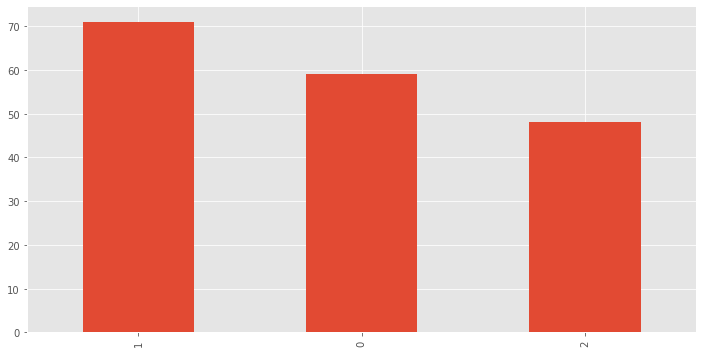

In [16]:
# ploting value counts
df["target"].value_counts().plot(kind = "bar")

#### Numerical data
we can describe its distribution with describe() as we have seen before and we can display it with .hist().

In [17]:
df["magnesium"].describe()

count    178.000000
mean      99.741573
std       14.282484
min       70.000000
25%       88.000000
50%       98.000000
75%      107.000000
max      162.000000
Name: magnesium, dtype: float64

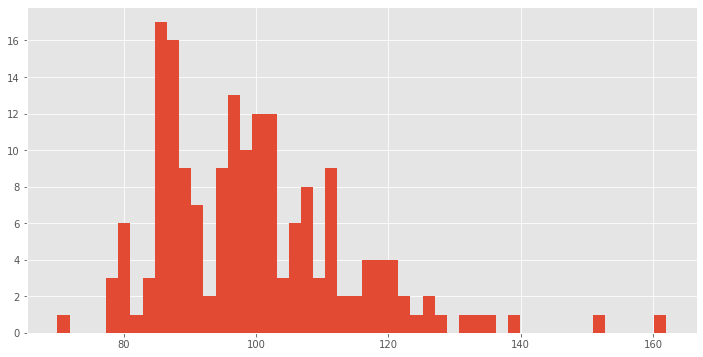

In [19]:
df["magnesium"].hist(bins = 50)

In [21]:
df["magnesium"].skew()

1.098191054755161

Skewness is a measure of symmetry, or more precisely, the lack of symmetry. A distribution, or data set, is symmetric if it looks the same to the left and right of the center point.

Kurtosis is a measure of whether the data are heavy-tailed or light-tailed relative to a normal distribution. That is, data sets with high kurtosis tend to have heavy tails, or outliers. Data sets with low kurtosis tend to have light tails, or lack of outliers. A uniform distribution would be the extreme case.

In [23]:
# evaluating the distribution kurtosis and asymmetry
print(f"Skewness: {df['magnesium'].skew()}")
print(f"Kurtosis: {df['magnesium'].kurt()}")

Skewness: 1.098191054755161
Kurtosis: 2.1049913235905557


### Study of relationship between variables

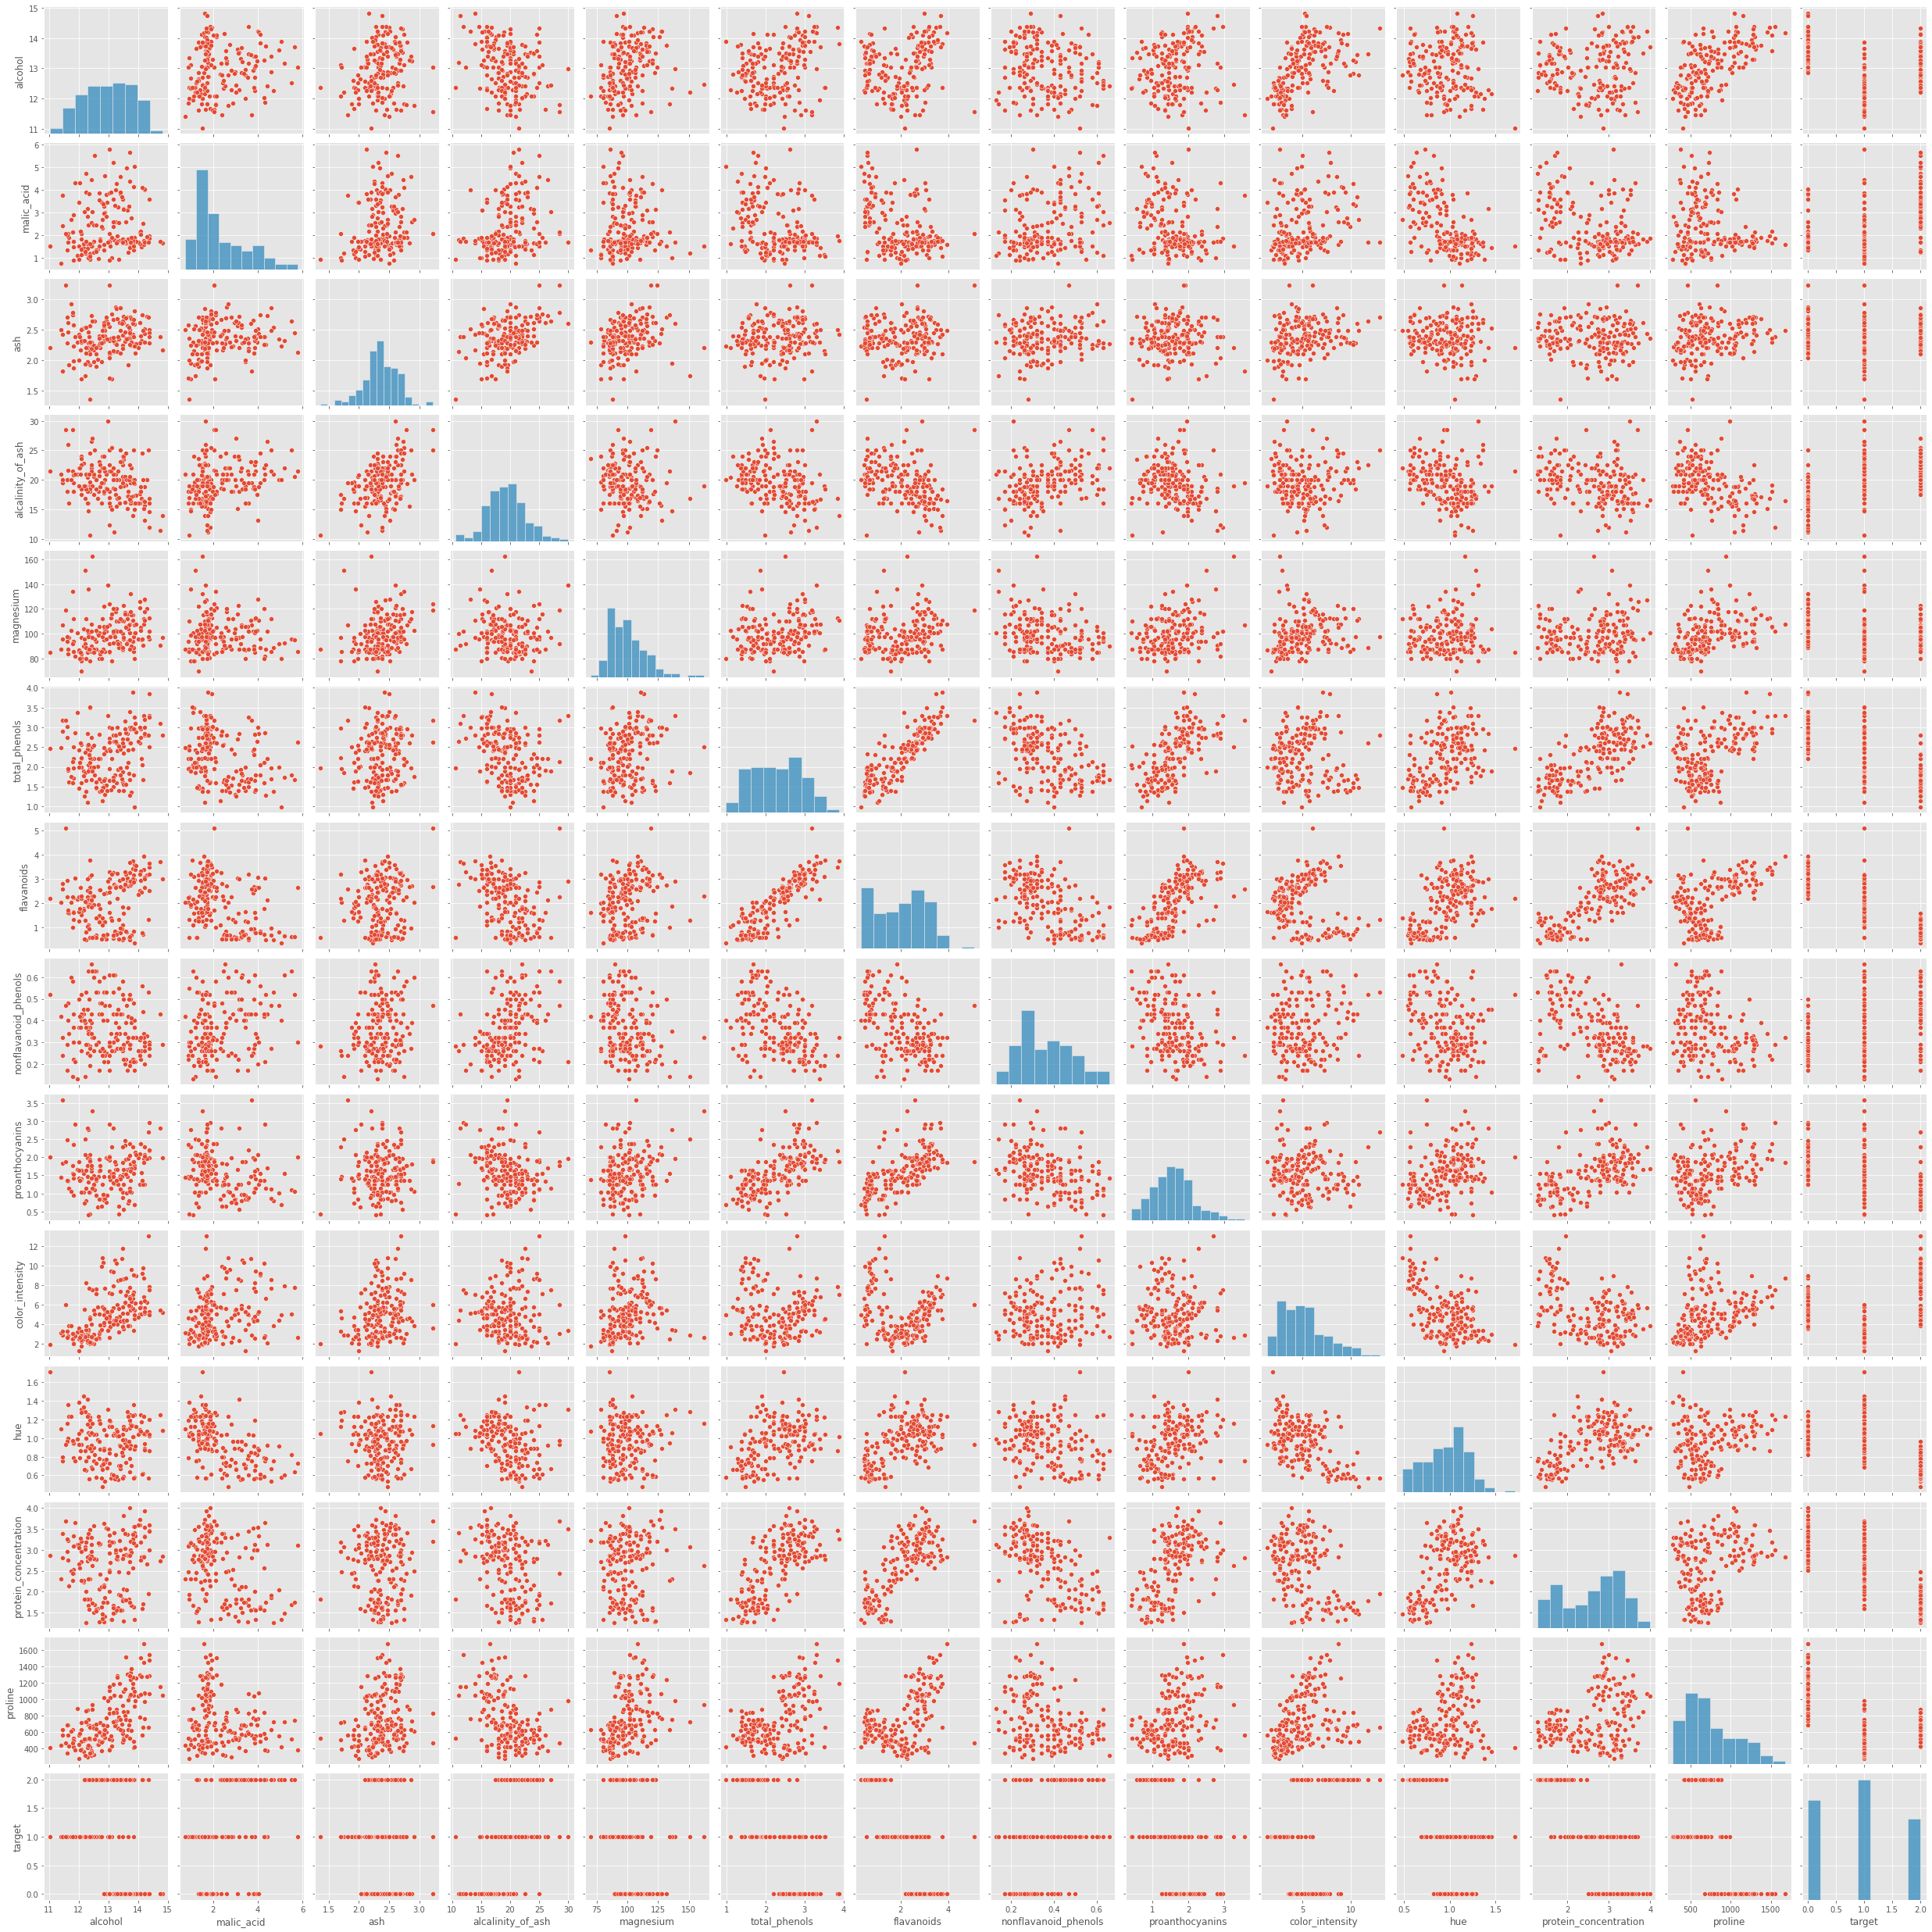

In [24]:
sns.pairplot(df)

The best way to understand the relationship between a numeric variable and a categorical variable is through a boxplot.

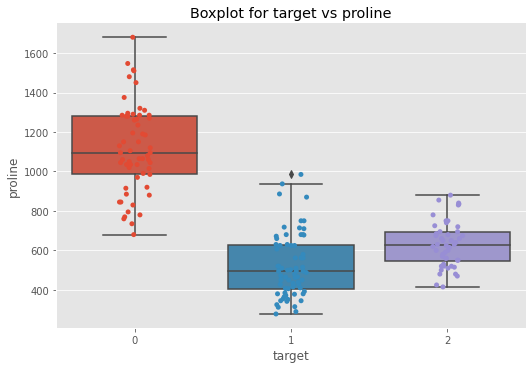

In [26]:
sns.catplot(x="target", y="proline", data =df, kind="box", aspect=1.5)
#adding data points
sns.stripplot(x='target', y ="proline", data = df)
plt.title("Boxplot for target vs proline")
plt.show()